Воронов Кирилл Михайлович, М8О-407Б-19

# Лабораторная номер 1

## Crab Age Prediction
## Предсказание возраста краба
https://www.kaggle.com/datasets/sidhus/crab-age-prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import collections
import sklearn
import pickle

In [2]:
data = pd.read_csv('CrabAgePrediction.csv')
print(data.shape)
data.head()

(3893, 9)


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


1. Sex: пол краба
2. Length: длина (в футах)
3. Diameter: диаметр (в футах)
4. Height: высота (в футах)
5. Weight: вес (в унциях)
6. Shucked Weight: масса краба без панциря (в унциях)
7. Viscera Weight: масса внутренних органов (в унциях)
8. Shell Weight: вес оболочки (в унциях)
9. Age: возраст (в месяцах)


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB
None


Проверим на наличие пустых данных

In [4]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

Посмотрим, сколько крабов, для которых неизвестен пол

In [5]:
dt = data.loc[data['Sex'] == "I"]
dt.shape

(1233, 9)

Удалим эти данные

In [6]:
data = data.loc[data['Sex'] != "I"]

In [7]:
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
5,F,1.5500,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8
6,F,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15


In [8]:
data.shape

(2660, 9)

Удалим дубликаты, если они есть

In [9]:
data.drop_duplicates(keep='last')

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
5,F,1.5500,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8
6,F,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15
...,...,...,...,...,...,...,...,...,...
3885,F,1.1875,0.9500,0.3375,13.777857,4.918638,1.984465,5.244657,7
3886,F,1.3250,1.0250,0.3625,23.402512,10.631063,5.783298,6.945627,9
3887,F,1.7500,1.3750,0.4250,47.740558,21.361348,9.256112,9.071840,11
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8


Сделаем числовое отображение пола

In [10]:
data["Sex"] = [0 if i == "M" else 1 for i in data["Sex"]]

In [11]:
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,0,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
3,1,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
5,1,1.5500,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8
6,1,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15


Посмотрим на распределения признаков

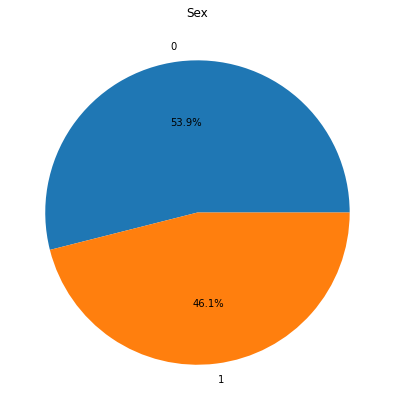

In [12]:
fig = plt.figure(figsize=(7,7))
plt.pie(data["Sex"].value_counts(), labels = data["Sex"].value_counts().index, autopct='%1.1f%%')
plt.title("Sex")
None

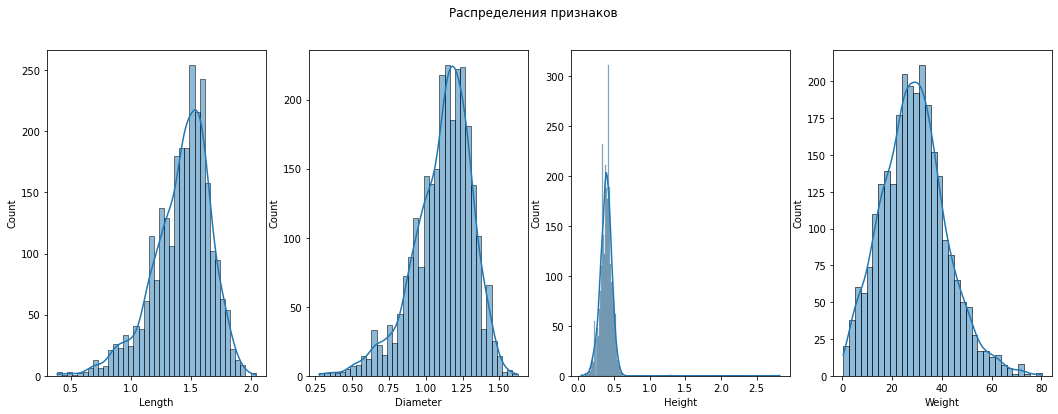

In [13]:
fig, ax = plt.subplots(1,4, figsize=(18,6))
fig.suptitle('Распределения признаков')
sns.histplot(data['Length'], ax = ax[0], kde = True)
sns.histplot(data['Diameter'], ax = ax[1], kde = True)
sns.histplot(data['Height'], ax = ax[2], kde = True)
sns.histplot(data['Weight'], ax = ax[3], kde = True)
None

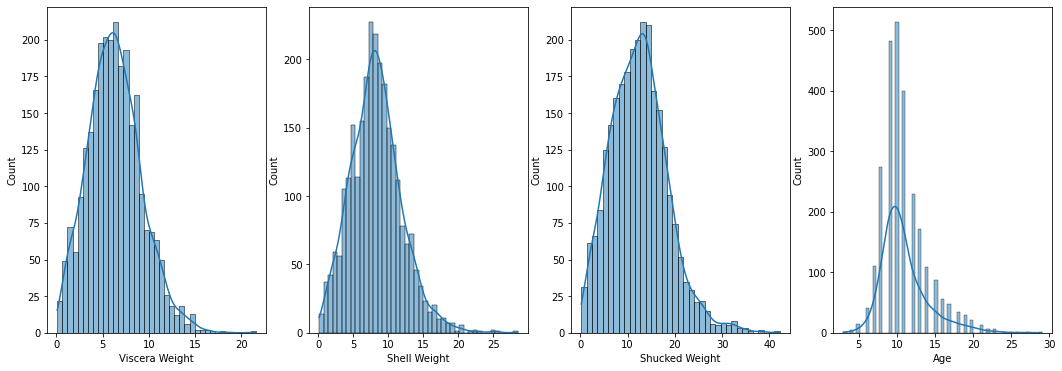

In [14]:
fig, ax = plt.subplots(1,4, figsize=(18,6))
sns.histplot(data['Viscera Weight'], ax = ax[0], kde = True)
sns.histplot(data['Shell Weight'], ax = ax[1], kde = True)
sns.histplot(data['Shucked Weight'], ax = ax[2], kde = True)
sns.histplot(data['Age'], ax = ax[3], kde = True)
None

Распределения признаков отдалённо похожи на нормальное

In [15]:
data.corr()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Sex,1.000000,0.090459,0.096969,0.087231,0.061003,0.032269,0.074091,0.079325,0.067841
Length,0.090459,1.000000,0.977698,0.693980,0.922259,0.887440,0.889274,0.868039,0.307115
Diameter,0.096969,0.977698,1.000000,0.702587,0.917469,0.874377,0.877009,0.877744,0.335931
Height,0.087231,0.693980,0.702587,1.000000,0.710222,0.655769,0.679933,0.707675,0.325787
Weight,0.061003,0.922259,0.917469,0.710222,1.000000,0.955932,0.946139,0.930087,0.324241
Shucked Weight,0.032269,0.887440,0.874377,0.655769,0.955932,1.000000,0.900268,0.822870,0.164480
Viscera Weight,0.074091,0.889274,0.877009,0.679933,0.946139,0.900268,1.000000,0.852147,0.270484
Shell Weight,0.079325,0.868039,0.877744,0.707675,0.930087,0.822870,0.852147,1.000000,0.459941
Age,0.067841,0.307115,0.335931,0.325787,0.324241,0.164480,0.270484,0.459941,1.000000


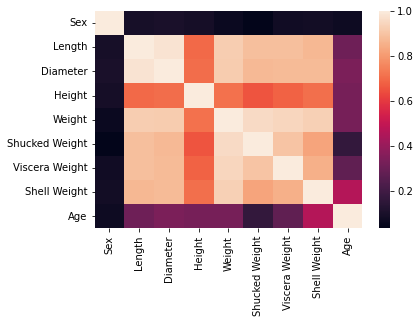

In [16]:
sns.heatmap(data.corr())
None

Больше всего влияет: Shell Weight 

Меньше всего: Sex, Shucked Weight

In [17]:
data.describe()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,0.460526,1.423943,1.116198,0.386114,28.817475,12.421792,6.307034,8.260565,10.915038
std,0.498533,0.239300,0.196878,0.094031,12.821337,5.989869,2.880555,3.642927,3.058831
min,0.000000,0.387500,0.275000,0.037500,0.439417,0.184272,0.085048,0.141747,3.000000
25%,0.000000,1.287500,1.000000,0.337500,19.855281,8.093782,4.323299,5.808104,9.000000
50%,0.000000,1.462500,1.150000,0.387500,28.462898,12.232809,6.166016,8.079607,10.000000
75%,1.000000,1.587500,1.250000,0.437500,36.560224,16.063535,8.136306,10.347568,12.000000
max,1.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


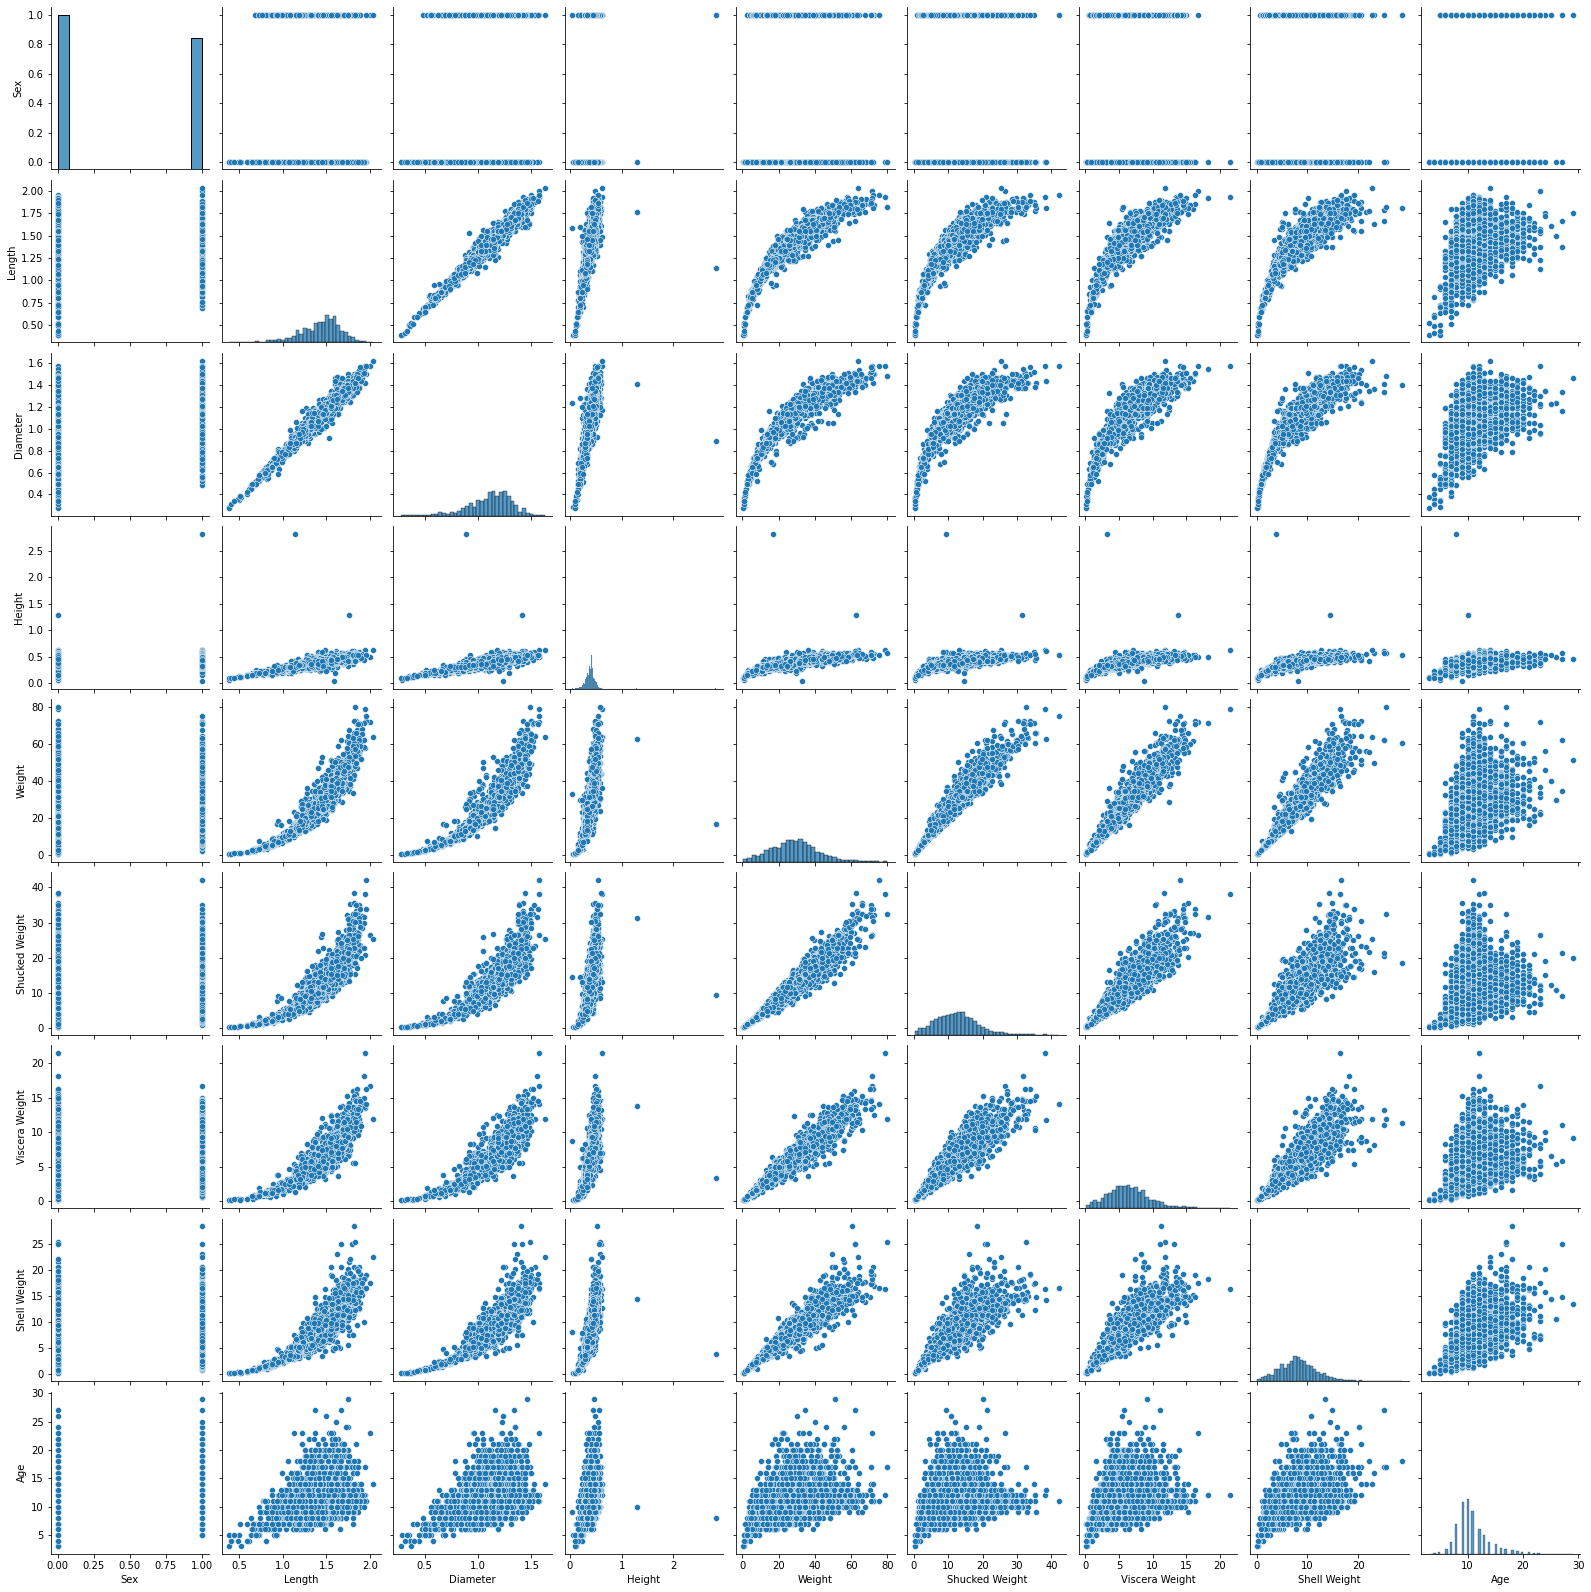

In [18]:
sns.pairplot(data = data)
None

Видно, что есть два выброса (крабы с очень большой выосотой и маленьким весом), удалим их

In [19]:
data = data.sort_values(by = 'Height')
data.tail()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
2588,1,1.4875,1.1750,0.6250,36.372408,13.097469,7.016501,12.615528,14
1485,1,2.0375,1.6250,0.6250,63.928123,25.245230,11.906790,22.608726,14
772,0,1.9375,1.5750,0.6250,78.797435,38.229301,21.545620,16.386011,12
748,0,1.7625,1.4125,1.2875,62.652395,31.397071,13.792032,14.514944,10
2256,1,1.1375,0.8875,2.8250,16.839603,9.412034,3.288542,3.784658,8


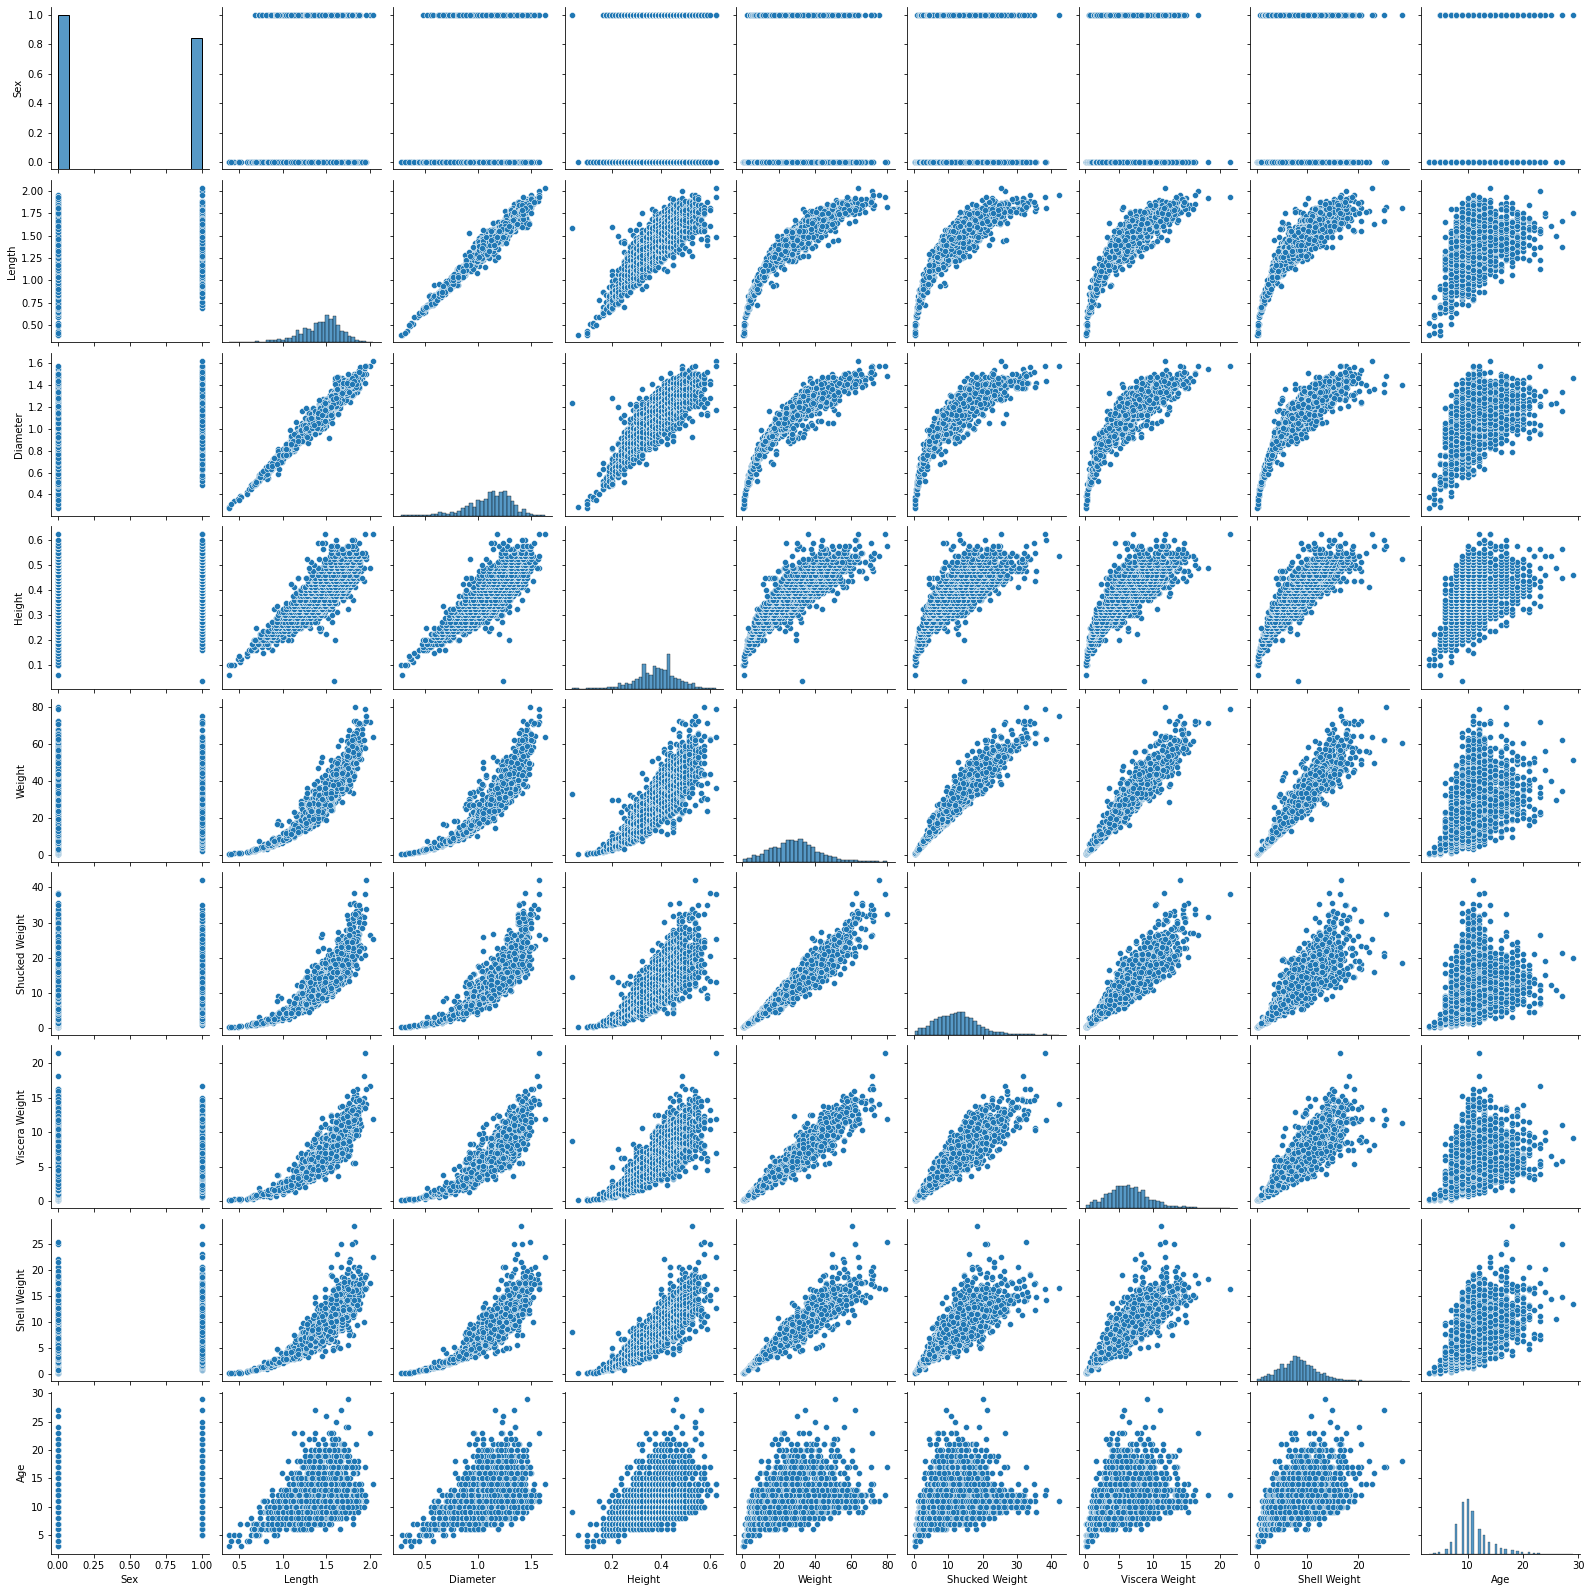

In [20]:
data = data.drop(index=[2256])
data = data.drop(index=[748])
sns.pairplot(data = data)
None

### Разделение данных на тестовые и обучающие

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import max_error
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

x = data.drop(columns = 'Age')
y = data['Age']
x_train, x_test, train_labels, test_labels = train_test_split(x.to_numpy(), y.to_numpy(), test_size = 0.2, random_state = 30)

### Функция отображение результатов

In [23]:
def Print_scores(x_train, pred):
    fig = plt.figure(figsize = (7,7))
    fig.add_subplot(111, aspect = 'equal')
    plt.axline((0,0),(1,1), ls = '--', c = 'r')
    plt.scatter(pred, test_labels)

    print(f"Max_error tests: {max_error(test_labels, pred)}")
    print(f"Mean_absolute_error tests: {mean_absolute_error(test_labels, pred)}")
    print(f"Mean_squared_error tests: {mean_squared_error(test_labels, pred)}")

# Linear/ Logistic Regression

In [37]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Linear(BaseEstimator, ClassifierMixin):
    def __init__(self, lr, nepoch, batch_size):
        self.lr = lr
        self.nepoch = nepoch
        self.batch_size = batch_size
        pass

        
    def fit(self, data, labels):
        data = np.concatenate((data, np.ones((data.shape[0],1))), axis = 1)
        self.W = np.random.normal(0, 1, (len(data[0]),))
        
        for i in range(self.nepoch):
            for i in range(0, len(data), self.batch_size):
                xb = data[i:i + self.batch_size]
                yb = labels[i:i + self.batch_size]
                p = np.dot(self.W, xb.T)
                dp = np.dot(xb.T, (p - yb).T)
                self.W -= self.lr * dp
        
    def predict(self, maindata):
        maindata = np.concatenate((maindata, np.ones((maindata.shape[0],1))), axis = 1)
        p = np.dot(self.W, maindata.T)
        return p


In [25]:
import sklearn
from sklearn.preprocessing import Normalizer

lin = Pipeline(steps = [('normalizer', Normalizer()),('lin', Linear(0.1, 100, 5))])
print(lin.get_params())

{'memory': None, 'steps': [('normalizer', Normalizer()), ('lin', Linear(batch_size=5, lr=0.1, nepoch=100))], 'verbose': False, 'normalizer': Normalizer(), 'lin': Linear(batch_size=5, lr=0.1, nepoch=100), 'normalizer__copy': True, 'normalizer__norm': 'l2', 'lin__batch_size': 5, 'lin__lr': 0.1, 'lin__nepoch': 100}


In [26]:
lin.fit(x_train, train_labels)
pred = lin.predict(x_test)

Max_error tests: 10.167618009356385
Mean_absolute_error tests: 1.7304553448076858
Mean_squared_error tests: 5.933008765880661


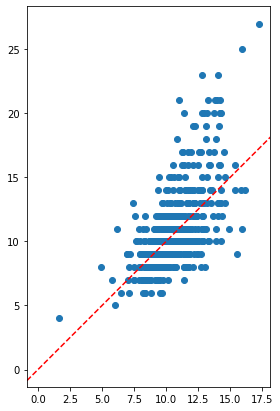

In [27]:
Print_scores(x_train, pred)

In [28]:
lin = Pipeline(steps = [('normalizer', Normalizer()),('lin', LinearRegression())])
print(lin.get_params())

{'memory': None, 'steps': [('normalizer', Normalizer()), ('lin', LinearRegression())], 'verbose': False, 'normalizer': Normalizer(), 'lin': LinearRegression(), 'normalizer__copy': True, 'normalizer__norm': 'l2', 'lin__copy_X': True, 'lin__fit_intercept': True, 'lin__n_jobs': None, 'lin__normalize': 'deprecated', 'lin__positive': False}


In [29]:
lin.fit(x_train, train_labels)
pred = lin.predict(x_test)

Max_error tests: 9.9353349195775
Mean_absolute_error tests: 1.746775438406938
Mean_squared_error tests: 5.7002627729847335


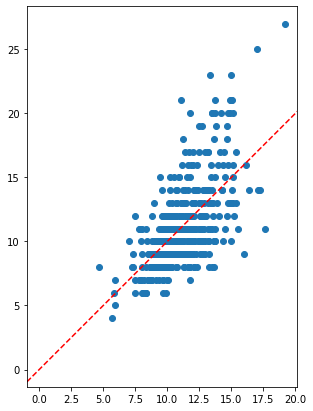

In [30]:
Print_scores(x_train, pred)

Попробуем кросс-валидацию

In [31]:
from sklearn.linear_model import SGDRegressor

lin = Pipeline(steps = [('StandardScaler', StandardScaler()),('lin', SGDRegressor())])
print(lin.get_params())

{'memory': None, 'steps': [('StandardScaler', StandardScaler()), ('lin', SGDRegressor())], 'verbose': False, 'StandardScaler': StandardScaler(), 'lin': SGDRegressor(), 'StandardScaler__copy': True, 'StandardScaler__with_mean': True, 'StandardScaler__with_std': True, 'lin__alpha': 0.0001, 'lin__average': False, 'lin__early_stopping': False, 'lin__epsilon': 0.1, 'lin__eta0': 0.01, 'lin__fit_intercept': True, 'lin__l1_ratio': 0.15, 'lin__learning_rate': 'invscaling', 'lin__loss': 'squared_error', 'lin__max_iter': 1000, 'lin__n_iter_no_change': 5, 'lin__penalty': 'l2', 'lin__power_t': 0.25, 'lin__random_state': None, 'lin__shuffle': True, 'lin__tol': 0.001, 'lin__validation_fraction': 0.1, 'lin__verbose': 0, 'lin__warm_start': False}


{'lin__eta0': 0.5, 'lin__max_iter': 1000}
Max_error train: 1.9952487183442424
Max_error tests: 11.671851993812698
Mean_absolute_error tests: 1.917514802060478
Mean_squared_error tests: 7.034853944912262


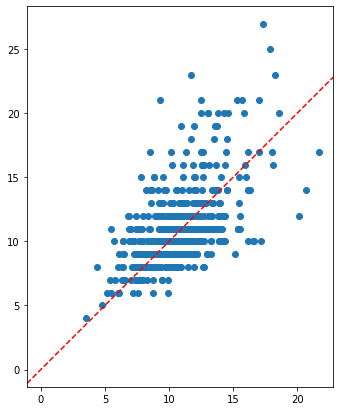

In [32]:
gcv = GridSearchCV(estimator = lin, scoring = make_scorer(mean_absolute_error), param_grid={'lin__max_iter': [1000, 2000, 3000], 'lin__eta0': [0.5, 0.1, 0.01]})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Max_error train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

Видно, что линейная модель не справляется со своей задачей

# Decision tree

In [39]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()

Max_error tests: 13.0
Mean_absolute_error tests: 2.424812030075188
Mean_squared_error tests: 11.203007518796992


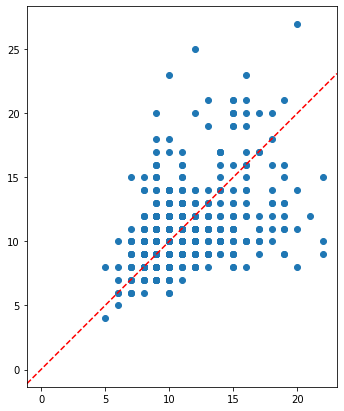

In [42]:
clf.fit(x_train, train_labels)

x_test_predict = clf.predict(x_test)
Print_scores(test_labels, x_test_predict)

# RandomForest

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

Max_error tests: 11.08
Mean_absolute_error tests: 1.763345864661654
Mean_squared_error tests: 6.106173308270677


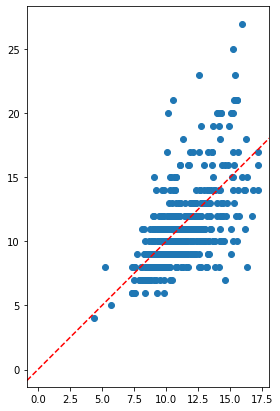

In [44]:
rf.fit(x_train, train_labels)

x_test_predict = rf.predict(x_test)
Print_scores(test_labels, x_test_predict)

## Выводы
Как видно, данный датасет не очень хорошо предсказывается вышеприведёнными моделями, они ошибаются примерно на 2 месяца. Это происходит из-за того, что возраст распределён очень своеобразно, в виде некого облака практически для всех признаков.
Однако, выполнив данную лабораторную работу, я вспомнил, как обрабатывать данные и обучать модели на их основе. 